In [1]:
import sys
sys.path.append('.')
from utils_neuromaps_brain import *
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat

### Plot a vector of nodal strength on the cortical surface (default parcellation -> Schaefer 100)

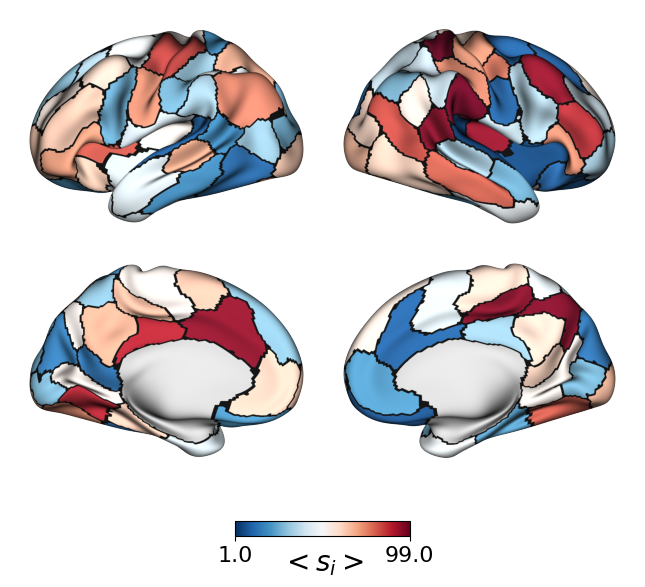

In [2]:
node_strength=np.random.randint(0,100,size=100)
N=100
fig=normal_view(node_strength,edges=True,exp_form=False)

### Other possible options

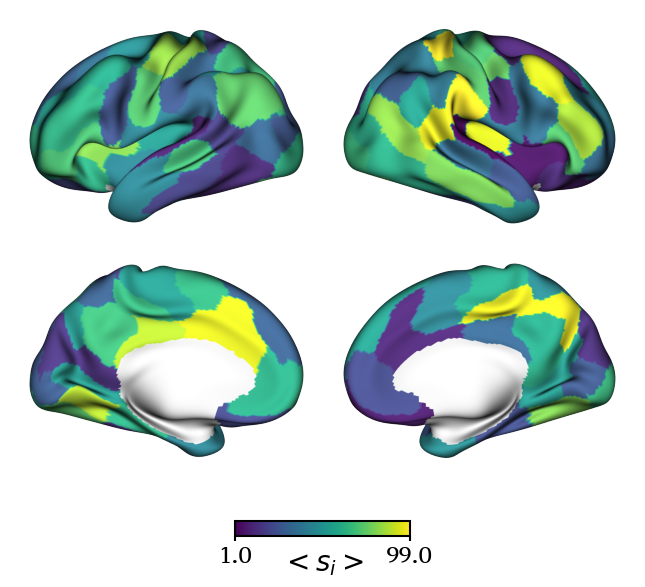

In [3]:
fig=normal_view(node_strength,edges=False,exp_form=False,q_thresh=0,cmap='viridis',parcellation=N,brightness=0.8)

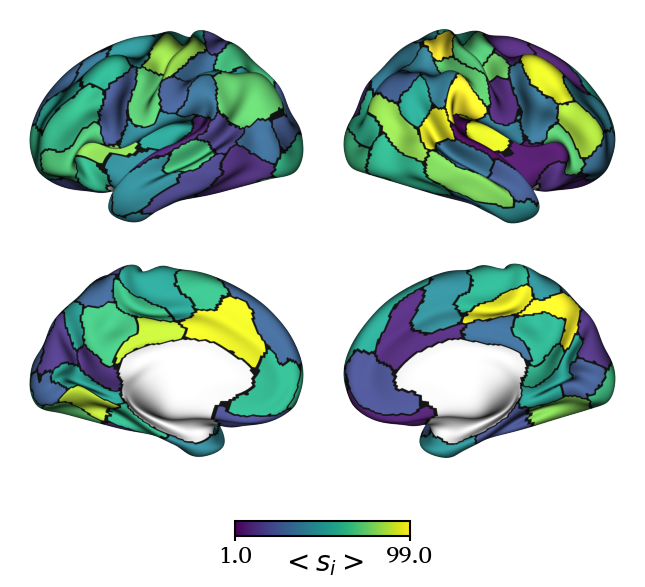

In [4]:
##Add Edges on the border (dark)
fig=normal_view(node_strength,edges=True,exp_form=False,q_thresh=0,cmap='viridis',parcellation=N,brightness=0.8)

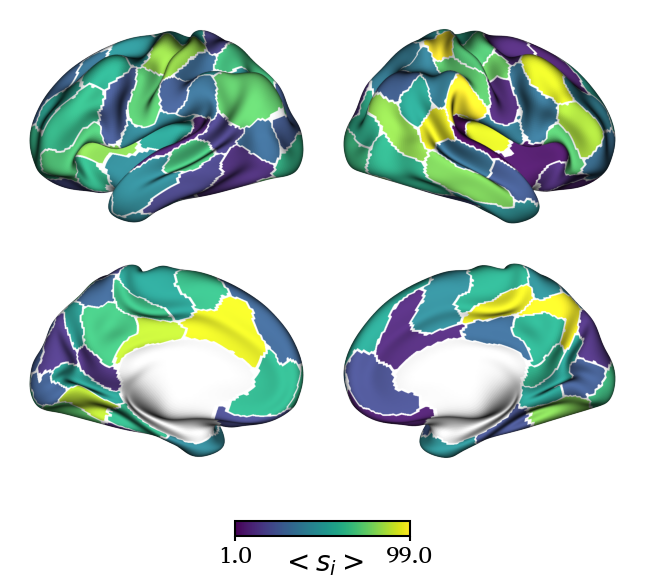

In [5]:
##Add Edges on the border (white)
fig=normal_view(node_strength,edges=True,exp_form=False,cmap='viridis',parcellation=N,brightness=0.8,graymap_rev=1)

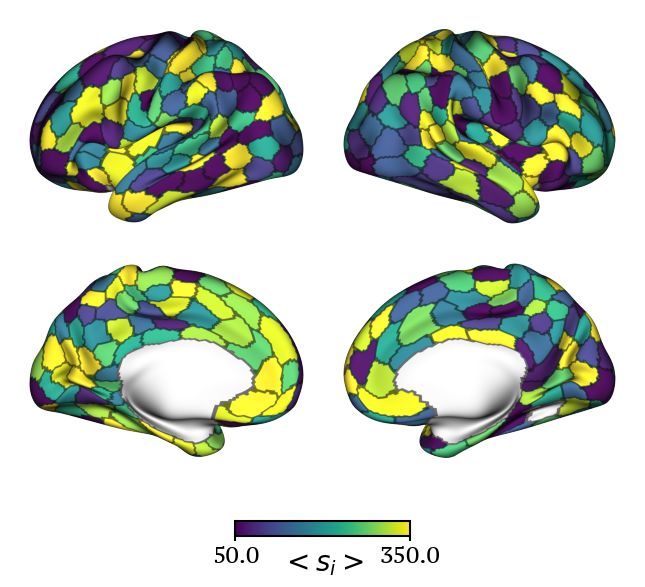

In [6]:
##Plot different parcellation and bound the colorbar between vmin and vmax
node_strength=np.random.randint(0,400,size=400)
N=400
fig=normal_view(node_strength,edges=True,exp_form=False,cmap='viridis',
                parcellation=N,brightness=0.8,graymap_rev=0,alpha_graymap=0.6,vmin=50,vmax=350)

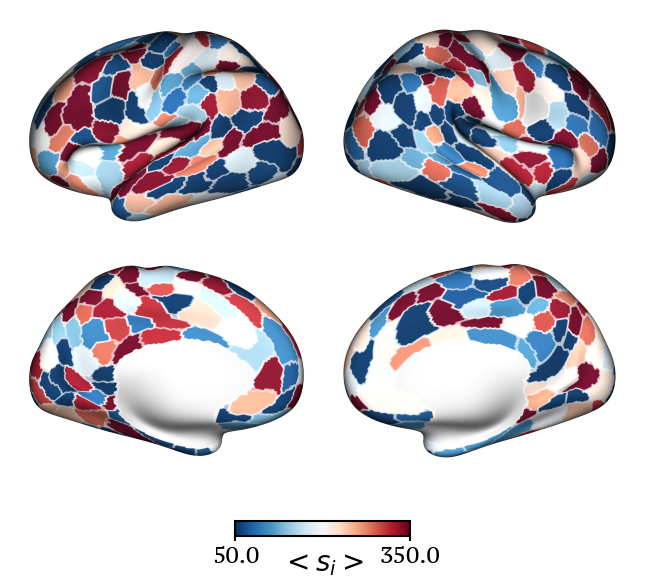

In [7]:
##Change the surface shape (3 possible ones: inflated, very inflated, midthickness)
node_strength=np.random.randint(0,400,size=400)
N=400
fig=normal_view(node_strength,edges=True,exp_form=False,cmap='RdBu_r',
                parcellation=N,brightness=0.8,graymap_rev=1,alpha_graymap=0.7,
                vmin=50,vmax=350, surftype='veryinflated')

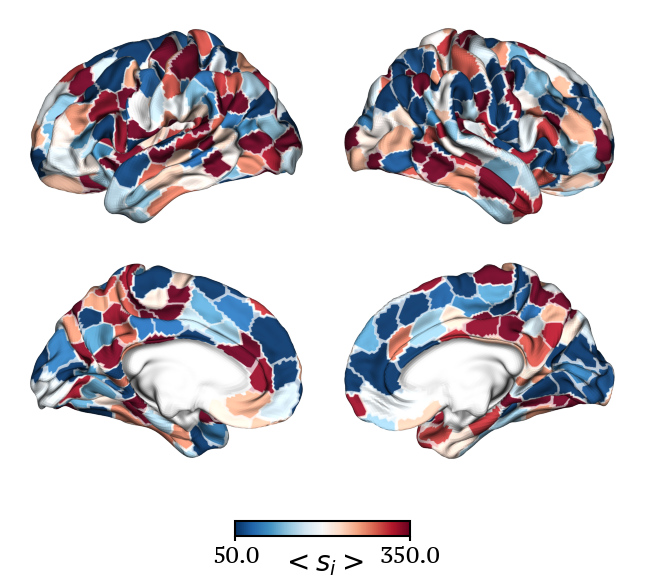

In [8]:
##Change the surface shape (3 possible ones)
node_strength=np.random.randint(0,400,size=400)
N=400
fig=normal_view(node_strength,edges=True,exp_form=False,cmap='RdBu_r',
                parcellation=N,brightness=0.8,graymap_rev=1,alpha_graymap=0.7,
                vmin=50,vmax=350, surftype='midthickness')

### Full view (similar to brainnetviewer -- view not fully tested and with less options)
The full view is obtained in a "dirty way" by assembling different svgs


** (org.inkscape.Inkscape:128224): WARNING **: 11:17:12.958: Duplicate option value ('2') for parameter 'pdftosvg' in extension 'tk.whywhow.writetex'.

** (org.inkscape.Inkscape:128224): WARNING **: 11:17:12.960: Duplicate option value ('2') for parameter 'pdftosvg' in extension 'tk.whywhow.writetex'.

** (org.inkscape.Inkscape:128224): WARNING **: 11:17:12.961: Duplicate option value ('2') for parameter 'pdftosvg' in extension 'tk.whywhow.writetex'.

** (org.inkscape.Inkscape:128224): WARNING **: 11:17:12.962: Duplicate option value ('2') for parameter 'pdftosvg' in extension 'tk.whywhow.writetex'.


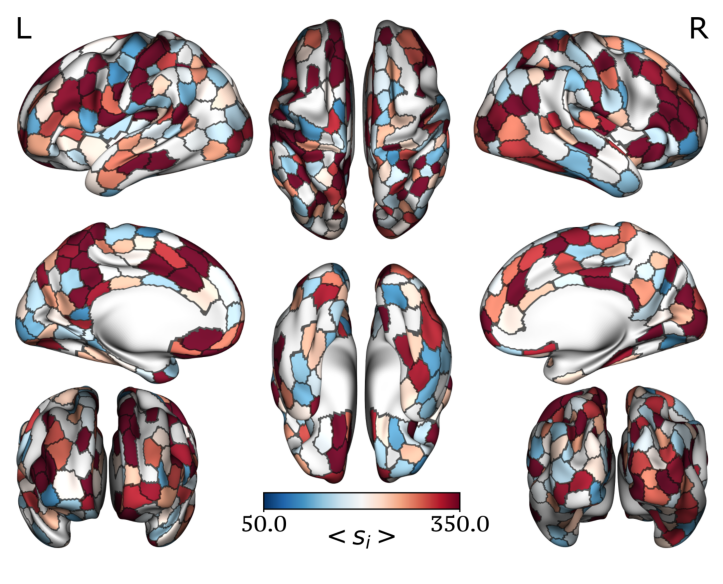

In [9]:

node_strength=np.random.randint(0,400,size=400)
N=400
fig=full_view(node_strength,edges=True,exp_form=False,cmap='RdBu_r',
                parcellation=N,brightness=0.8,graymap_rev=0,alpha_graymap=0.7,vmin_plot=50,vmax_plot=350)
compose_full_view();

### Plotting the 7 functional networks

In [10]:
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.lines import Line2D
alpha=1
colors = [mpl.colors.to_rgba('purple',alpha), #Visual
          mpl.colors.to_rgba('lightblue',alpha),#Somatomotor
          mpl.colors.to_rgba('green',alpha),#Dorsal Attention
          mpl.colors.to_rgba('violet',alpha),#Ventral Attention
          mpl.colors.to_rgba('yellow',alpha),#Limbic
          mpl.colors.to_rgba('orange',alpha),#Frontoparietal
          mpl.colors.to_rgba('red',alpha),#Default
         ]
n_bin=7
cmap_name = 'my_list'

cmap = LinearSegmentedColormap.from_list(cmap_name, colors, N=n_bin)


In [11]:
from scipy.io import loadmat
N=400
yeo_all=loadmat('YeoOrder/yeo_RS7_Schaefer{0}S.mat'.format(N))
## Yeo functional networks: 
## Thomas Yeo, B. T., et al. "The organization of the human cerebral cortex estimated by intrinsic functional connectivity." Journal of neurophysiology 106.3 (2011): 1125-1165.
nodeID_yeomap=np.array([i[0] for i in yeo_all['yeoROIs']])

node_strength=np.zeros(N)
for i in range(1,8):
    node_strength[np.array(nodeID_yeomap==i)[:N]]=(i)*10+np.random.normal(loc=0.0,scale=0.1,size=sum(np.array(nodeID_yeomap==i)[:N]))

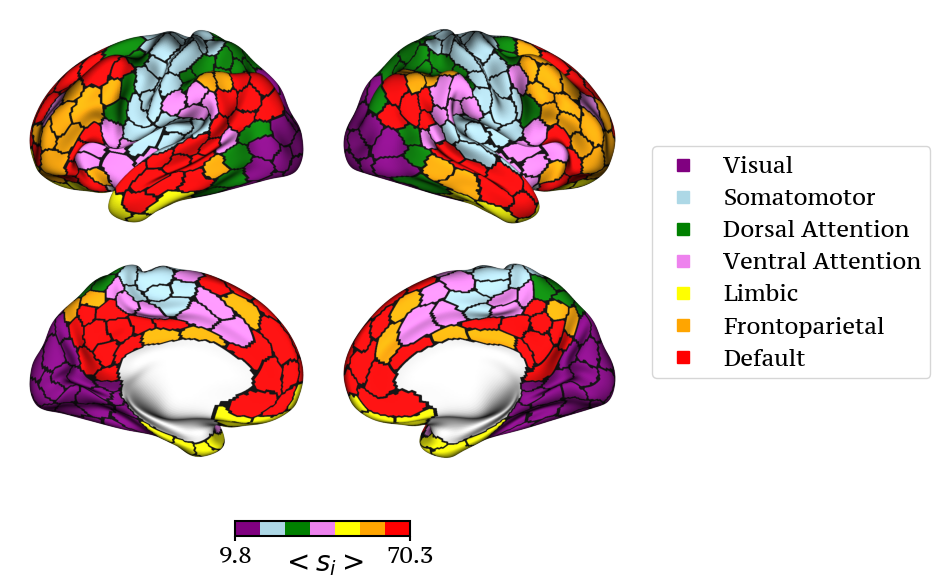

In [12]:
fig=normal_view(node_strength,edges=True,exp_form=False,q_thresh=0,cmap=cmap,parcellation=N,brightness=0.8)
rect = [Line2D([], [], marker="s", markersize=8, linewidth=0, color=colors[i]) for i in range(len(colors))]
#ax.legend((rect1, rect2), ('Men', 'Women'))
fig.legend(rect,('Visual', 'Somatomotor','Dorsal Attention',\
                 'Ventral Attention','Limbic','Frontoparietal','Default'),bbox_to_anchor=(1.2,0.7),fontsize=16)